## TP5 (Perceptron multicouche avec jeux de donnees .csv)
##    GROUPE 3 CONSTITUE DE :
##        - LEPAFO MOFFO Baurel               21S2782
##        - MANFOUO SELATSA Ridano            16U2848
##        - TEINGA KAMGUEN Emmanuel Rufin     21S2822
##        - MEBODO ONOMO JUSTIN JORDAN        19M2217


In [97]:
## Pour resoudre un probleme avec les reseaux de neuronnes ils nous faut :
##  - faire une enquete sur quel architecture des reseaux de neuronnes est le plus convenable  pour le probleme cite
##  - Definir l'architechture du reseau de neuronne au travers du langage ou de la librairie choisie
##  - Convertir les donnees dans un bon format(one hot encoding et word2vec encoding) et les diviser en lot/groupe
##  - faire un des donnees accordees a nos besoins
##  - Augmenter les donnees pour augmenter la taille du jeux d'entrainement et d'avoir de meilleur rendu d'entrainement
##  - alimenter les batch(groupes) au reseau de neuronnes
##  - Entrainer et controler les changements dans l'ensemble d'entrainement et de validation
##  - Pour finir tester le modele et le sauvegarder  pour une future utilisation

In [98]:
## Dans notre devoir nous travaillons sur l'identification des chiffres  (Indentify Digits)

In [149]:
## ici on commence par importer les library necessaire

%pylab inline
import os
import numpy as np
import pandas as pd
import imageio
from sklearn.metrics import accuracy_score
import tensorflow as tf
import keras

Populating the interactive namespace from numpy and matplotlib


E:\Program_Files_Disque_E\Anaconda\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['test', 'seed']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


ModuleNotFoundError: No module named 'pillow'

In [102]:
## pour arreter d'avoir a chaque redemarrage de cette cellule du notebook d'avoir differentes valeurs

seed=128
rng = np.random.RandomState(seed)

In [103]:
## cette etape consiste a garder les chemin d'acces aus differents dossiers
root_dir =os.path.abspath('./')
data_dir = os.path.join(root_dir,'data')
## pour regarder l'existence , des differents dossiers, 
## on fait:
os.path.exists(root_dir)
os.path.exists(data_dir)
## pour savoir si les chemeins existent

True

In [104]:
## chargeons les donnees:
train = pd.read_csv(os.path.join(data_dir,'train.csv'))
test = pd.read_csv(os.path.join(data_dir,'Test.csv'))
sample_submission = pd.read_csv(os.path.join(data_dir,'sample_submission.csv'))
train.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


In [105]:
## cle de notre jeux de test
test.keys()

Index(['filename'], dtype='object')

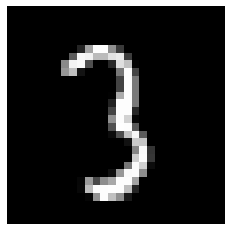

In [106]:
## regardons a quoi ressemble nos donnees

img_name = rng.choice(train.filename)
filepath = os.path.join(data_dir,'Images','train',img_name)

img = imageio.imread(filepath,as_gray=True)
pylab.imshow(img,cmap='gray')
pylab.axis('off')
pylab.show()

In [108]:
img

Array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [148]:
## enregistrement de nos donnees dans un tableau numpy

temp = []

for img_name in train.filename:
    image_path = os.path.join(data_dir,'Images','train', img_name)
    img = imageio.imread(image_path,as_gray=True)
    img = img.astype('float32')
    temp.append(img)

print(temp)
train_x=np.stack(temp)
print(train_x)
train_x /= 255.0 ## on divise pour avoir les donnees facile a calculer

train_x = train_x.reshape(-1,784).astype('float32')


temp = []

for img_name in test.filename:
    image_path = os.path.join(data_dir,'Images','test',img_name)
    img= imageio.imread(image_path)
    img = img.astype('float32')
    temp.append(img)

test_x = np.stack(temp)
test_x /= 255.0
test_x = test_x.reshape(-1,  784).astype('float32')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



KeyboardInterrupt: 

In [110]:
train_y = keras.utils.np_utils.to_categorical(train.label.values)

In [111]:
## divison le jeux de donnee en ensemble d'entrainement et de vaidation
## 70% , 30%

split_size = int(train_x.shape[0]*0.7)

train_x,val_x =train_x[:split_size],train_x[split_size:]
train_y,val_y =train_y[:split_size],train_y[split_size:]

In [112]:
# Voici comment on crée le modèle

input_num_units = 784
hidden_num_units = 50
output_num_units = 10
epochs = 5
batch_size = 128

# Importation des modules keras pour creer notre modele

from keras.models import Sequential
from keras.layers import Dense

# Creation du modele

model = Sequential([
    Dense(input_num_units, activation = 'relu'), 
    Dense(hidden_num_units, activation='relu'),
    # On utilise une d'activation ReLu pour les couches cachees et celle d'entrees
    Dense(output_num_units, activation = 'softmax')
    # On utilise la fonction d'activation softmax pour la couche de sortie
    
])

In [113]:
# compilation du model avec les attributs necessaires
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [114]:
## entrainement du modele
# ici nb_epochs est remplace par epochs
trained_model = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

Epoch 1/5
268/268 [==============================] - 4s 13ms/step - loss: 0.2981 - accuracy: 0.9129 - val_loss: 0.1612 - val_accuracy: 0.9522
Epoch 2/5
268/268 [==============================] - 3s 12ms/step - loss: 0.1143 - accuracy: 0.9661 - val_loss: 0.1129 - val_accuracy: 0.9659
Epoch 3/5
268/268 [==============================] - 3s 12ms/step - loss: 0.0699 - accuracy: 0.9790 - val_loss: 0.0947 - val_accuracy: 0.9714
Epoch 4/5
268/268 [==============================] - 3s 12ms/step - loss: 0.0472 - accuracy: 0.9852 - val_loss: 0.0964 - val_accuracy: 0.9716
Epoch 5/5
268/268 [==============================] - 3s 12ms/step - loss: 0.0311 - accuracy: 0.9906 - val_loss: 0.0924 - val_accuracy: 0.9709


## Passons a l'evaluation de notre modele

Prediction is:  3


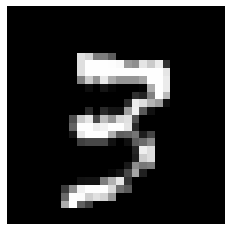

In [144]:
pred = np.argmax(model.predict(test_x),axis=1)## on predit les classe de notre jeux de test
img_name = rng.choice(test.filename) ## on fait un choix aleatoire pour notre jeux de text par nom de fichier
filepath = os.path.join(data_dir, 'Images', 'test', img_name)
img = imread(filepath)
test_index = int(img_name.split('.')[0]) - train.shape[0]
print("Prediction is: ", pred[test_index])
pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()

In [121]:
## pour voir si notre modele predit bien nous allons utiliser notre jeux de soumission

sample_submission.filename = test.filename;
sample_submission.label = pred
sample_submission.to_csv(os.path.join('sample_submission.csv'),index='false')

In [122]:
## Voyons maintenant les hyperparametre a avoir pour un reseau de neurones
## nous avons entre autre: Le type d'architechture,le nombre de couches, Nombre de neuronnes,le pas,type d'optimisation,Drop out rate, Les poids

## importation des bibliotheques
from sklearn.metrics import accuracy_score
import tensorflow as tf
from keras.layers import Dropout

In [123]:
## suppression d'aleatoire
seed =128
rng = np.random.RandomState(seed)

In [124]:
## Ici Nous augmentons un peu le nombre d'unite de couche cachee
input_num_units = 784
hidden_num_units = 500
output_num_units = 10

epochs = 5
batch_size = 128

# Creation du modele

model = Sequential([
    Dense(input_num_units, activation = 'relu'),
    Dense(hidden_num_units, activation='relu'),
    # On utilise une d'activation ReLu pour les couches cachees et celle d'entrees
    Dense(output_num_units, activation = 'softmax')
    # On utilise la fonction d'activation softmax pour la couche de sortie
    
])


In [125]:
## compilation du modele sachant le nombre d'unite de couche cachee modifiees
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
trained_model_500 = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

Epoch 1/5
268/268 [==============================] - 6s 19ms/step - loss: 0.2526 - accuracy: 0.9263 - val_loss: 0.1397 - val_accuracy: 0.9576
Epoch 2/5
268/268 [==============================] - 5s 18ms/step - loss: 0.0905 - accuracy: 0.9716 - val_loss: 0.1206 - val_accuracy: 0.9649
Epoch 3/5
268/268 [==============================] - 5s 18ms/step - loss: 0.0564 - accuracy: 0.9820 - val_loss: 0.0874 - val_accuracy: 0.9726
Epoch 4/5
268/268 [==============================] - 5s 19ms/step - loss: 0.0363 - accuracy: 0.9879 - val_loss: 0.0912 - val_accuracy: 0.9733
Epoch 5/5
268/268 [==============================] - 5s 19ms/step - loss: 0.0235 - accuracy: 0.9926 - val_loss: 0.0996 - val_accuracy: 0.9732


In [126]:
## ici haut on remarque que notre loss function a une valeur beaucoup plus decroissante que dans le cas precedent

In [127]:
## ajoutons d'autres couches cachees de taille 50,50

input_num_units = 784
hidden1_num_units = 50
hidden2_num_units = 50
hidden3_num_units = 50
hidden4_num_units = 50
hidden5_num_units = 50
output_num_units = 10

epochs = 5
batch_size = 128

# Creation du modele

model = Sequential([
    Dense(input_num_units, activation = 'relu'),
    Dense(hidden1_num_units, activation='relu'),
    Dense(hidden2_num_units, activation='relu'),
    Dense(hidden3_num_units, activation='relu'),
    Dense(hidden4_num_units, activation='relu'),
    Dense(hidden4_num_units, activation='relu'),
    # On utilise une d'activation ReLu pour les couches cachees et celle d'entrees
    Dense(output_num_units, activation = 'softmax')
    # On utilise la fonction d'activation softmax pour la couche de sortie
    
])


In [128]:
## compilation du modele sachant le nombre de couches cachee modifiees
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
trained_model_5d = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

Epoch 1/5
268/268 [==============================] - 4s 14ms/step - loss: 0.4242 - accuracy: 0.8699 - val_loss: 0.1971 - val_accuracy: 0.9454
Epoch 2/5
268/268 [==============================] - 3s 12ms/step - loss: 0.1396 - accuracy: 0.9590 - val_loss: 0.1329 - val_accuracy: 0.9609
Epoch 3/5
268/268 [==============================] - 4s 13ms/step - loss: 0.0921 - accuracy: 0.9720 - val_loss: 0.1227 - val_accuracy: 0.9621
Epoch 4/5
268/268 [==============================] - 3s 13ms/step - loss: 0.0649 - accuracy: 0.9799 - val_loss: 0.1152 - val_accuracy: 0.9671
Epoch 5/5
268/268 [==============================] - 3s 13ms/step - loss: 0.0502 - accuracy: 0.9841 - val_loss: 0.1154 - val_accuracy: 0.9665


In [129]:
## l'entrainement fonctionne mais nous n'avons pas le resultat voulu ajoutons ici bas le dropout rate

input_num_units = 784
hidden1_num_units = 50
hidden2_num_units = 50
hidden3_num_units = 50
hidden4_num_units = 50
hidden5_num_units = 50
output_num_units = 10

epochs = 5
batch_size = 128

dropout_ratio = 0.2

model = Sequential([
 Dense(input_num_units, activation='relu'),
 Dropout(dropout_ratio),
 
 Dense(hidden1_num_units, activation='relu'),
 Dropout(dropout_ratio),
 Dense(hidden2_num_units, activation='relu'),
 Dropout(dropout_ratio),
 Dense(hidden3_num_units, activation='relu'),
 Dropout(dropout_ratio),
 Dense(hidden4_num_units, activation='relu'),
 Dropout(dropout_ratio),
 Dense(hidden5_num_units, activation='relu'),
 Dropout(dropout_ratio),
    
 Dense(output_num_units,activation='softmax'),
 ])

In [130]:
## regardons le taux de succes

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
trained_model_5d_with_dropout = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

Epoch 1/5
268/268 [==============================] - 5s 16ms/step - loss: 0.9834 - accuracy: 0.6610 - val_loss: 0.2753 - val_accuracy: 0.9273
Epoch 2/5
268/268 [==============================] - 4s 16ms/step - loss: 0.3439 - accuracy: 0.9130 - val_loss: 0.2095 - val_accuracy: 0.9475
Epoch 3/5
268/268 [==============================] - 4s 15ms/step - loss: 0.2373 - accuracy: 0.9423 - val_loss: 0.1667 - val_accuracy: 0.9594
Epoch 4/5
268/268 [==============================] - 4s 16ms/step - loss: 0.1855 - accuracy: 0.9552 - val_loss: 0.1502 - val_accuracy: 0.9652
Epoch 5/5
268/268 [==============================] - 4s 15ms/step - loss: 0.1557 - accuracy: 0.9620 - val_loss: 0.1495 - val_accuracy: 0.9665


In [132]:
## Bon ici nous voyons que nous n'obtenons pas le resultat voulu augmentons un peu la nombre d'epochs a 50

input_num_units = 784
hidden1_num_units = 50
hidden2_num_units = 50
hidden3_num_units = 50
hidden4_num_units = 50
hidden5_num_units = 50
output_num_units = 10

epochs = 50
batch_size = 128

dropout_ratio = 0.2

model = Sequential([
 Dense(input_num_units, activation='relu'),
 Dropout(dropout_ratio),
 
 Dense(hidden1_num_units, activation='relu'),
 Dropout(dropout_ratio),
 Dense(hidden2_num_units, activation='relu'),
 Dropout(dropout_ratio),
 Dense(hidden3_num_units, activation='relu'),
 Dropout(dropout_ratio),
 Dense(hidden4_num_units, activation='relu'),
 Dropout(dropout_ratio),
 Dense(hidden5_num_units, activation='relu'),
 Dropout(dropout_ratio),
    
 Dense(output_num_units,activation='softmax'),
 ])



In [133]:
## regardons le taux de succes

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
trained_model_5d_with_drop_more_epochs = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

Epoch 1/50
268/268 [==============================] - 5s 15ms/step - loss: 1.1225 - accuracy: 0.6045 - val_loss: 0.3783 - val_accuracy: 0.8659
Epoch 2/50
268/268 [==============================] - 4s 14ms/step - loss: 0.3872 - accuracy: 0.8922 - val_loss: 0.2053 - val_accuracy: 0.9459
Epoch 3/50
268/268 [==============================] - 4s 15ms/step - loss: 0.2560 - accuracy: 0.9352 - val_loss: 0.1656 - val_accuracy: 0.9588
Epoch 4/50
268/268 [==============================] - 4s 14ms/step - loss: 0.2045 - accuracy: 0.9493 - val_loss: 0.1624 - val_accuracy: 0.9596
Epoch 5/50
268/268 [==============================] - 4s 14ms/step - loss: 0.1643 - accuracy: 0.9610 - val_loss: 0.1404 - val_accuracy: 0.9646
Epoch 6/50
268/268 [==============================] - 4s 14ms/step - loss: 0.1415 - accuracy: 0.9669 - val_loss: 0.1304 - val_accuracy: 0.9689
Epoch 7/50
268/268 [==============================] - 4s 15ms/step - loss: 0.1194 - accuracy: 0.9715 - val_loss: 0.1386 - val_accuracy: 0.9681

In [137]:
## ici nous voyons que le resultat est beaucoup plus interessant mais on peut diminuer les valeur de nos hyperparametres pour avoir une meilleur perforamence
## Dans notre cas nous allons un peu reduire le nombre d'epochs


input_num_units = 784
hidden1_num_units = 50
hidden2_num_units = 50
hidden3_num_units = 50
hidden4_num_units = 50
hidden5_num_units = 50
output_num_units = 10

epochs = 25
batch_size = 128

dropout_ratio = 0.2

model = Sequential([
 Dense(input_num_units, activation='relu'),
 Dropout(dropout_ratio),
 
 Dense(hidden1_num_units, activation='relu'),
 Dropout(dropout_ratio),
 Dense(hidden2_num_units, activation='relu'),
 Dropout(dropout_ratio),
 Dense(hidden3_num_units, activation='relu'),
 Dropout(dropout_ratio),
 Dense(hidden4_num_units, activation='relu'),
 Dropout(dropout_ratio),
 Dense(hidden5_num_units, activation='relu'),
 Dropout(dropout_ratio),
    
 Dense(output_num_units,activation='softmax'),
 ])

In [138]:
## regardons le taux de succes

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
trained_model_deep_n_wide = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

Epoch 1/25
268/268 [==============================] - 5s 15ms/step - loss: 1.0047 - accuracy: 0.6600 - val_loss: 0.2816 - val_accuracy: 0.9238
Epoch 2/25
268/268 [==============================] - 4s 15ms/step - loss: 0.3409 - accuracy: 0.9116 - val_loss: 0.1839 - val_accuracy: 0.9515
Epoch 3/25
268/268 [==============================] - 4s 15ms/step - loss: 0.2346 - accuracy: 0.9426 - val_loss: 0.1729 - val_accuracy: 0.9557
Epoch 4/25
268/268 [==============================] - 4s 15ms/step - loss: 0.1856 - accuracy: 0.9558 - val_loss: 0.1391 - val_accuracy: 0.9651
Epoch 5/25
268/268 [==============================] - 4s 15ms/step - loss: 0.1570 - accuracy: 0.9625 - val_loss: 0.1384 - val_accuracy: 0.9673
Epoch 6/25
268/268 [==============================] - 4s 15ms/step - loss: 0.1340 - accuracy: 0.9690 - val_loss: 0.1344 - val_accuracy: 0.9687
Epoch 7/25
268/268 [==============================] - 4s 15ms/step - loss: 0.1218 - accuracy: 0.9713 - val_loss: 0.1475 - val_accuracy: 0.9667

## passons a l'evaluation de ce dernier modele qui semble le meilleur

Prediction is:  2


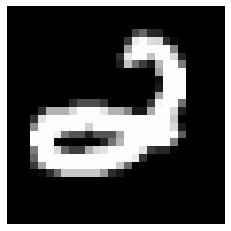

In [139]:
pred = np.argmax(model.predict(test_x),axis=1)## on predit les classe de notre jeux de test
img_name = rng.choice(test.filename) ## on fait un choix aleatoire pour notre jeux de text par nom de fichier
filepath = os.path.join(data_dir, 'Images', 'test', img_name)
img = imread(filepath)
test_index = int(img_name.split('.')[0]) - train.shape[0]
print("Prediction is: ", pred[test_index])
pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()